In [ ]:
import warnings
warnings.filterwarnings('ignore')
from visualdl import vdl
import segmentation_models_pytorch as smp
import torch
import os
import cv2
import timm
import albumentations as A
from skimage import io
import numpy as np
import segmentation_models_pytorch as smp
from skimage import io
#from custom import U2NET
import math
import numpy as np

In [ ]:
model = vdl.get_inference_model(r"F:\source\repos\VisualDL\resnet18, UnetPlusPlus.pt")

In [ ]:
torch.load(r"C:\Users\phili\Documents\001.pt").keys()

In [ ]:
np.cos(np.pi)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
t_range = np.arange(0, 2*np.pi, 0.05)
for t in t_range:
    #print((math.sin (t) * t, math.cos(t) * t))
    plt.plot(np.sin(t) * t, np.cos(t) * t, markersize=1, marker='o')

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

In [ ]:
timm.list_models()

In [ ]:
transform = A.Compose([
    A.Resize(width=128, height=128),
    A.RandomRotate90(p = 1),
    A.Transpose(p=1),
    A.RandomBrightness(p=1),
    A.RandomContrast(p=1),
    A.RandomShadow(p=1),
    A.RGBShift(p=1),
    A.RandomContrast(p=1),
])

transform = A.Compose([
    A.Resize(width=128, height=128),
    A.GridDistortion(p=1),
    A.OpticalDistortion(p=1),
    A.ElasticTransform(p=1)

])

image =  io.imread(r"C:\Users\phili\Downloads\Telegram Desktop\CellsFinal\Cells\right side\cells\train\images\05__1_5291_9286.png")
mask = io.imread(r"C:\Users\phili\Downloads\Telegram Desktop\CellsFinal\Cells\right side\cells\train\labels\05__1_5291_9286.png", as_gray = True)
io.imsave("orig.png", image)
io.imsave("origmask.png", mask)
trans = transform(image = image, mask = mask)
image = trans["image"]
mask = trans["mask"]
io.imsave("image.png", image)
io.imsave("mask.png", mask)

In [ ]:
model = smp.Unet(encoder_name = "timm-resnest50d", classes = 2, in_channels = 3)
model.eval()

In [ ]:
model.load_state_dict(torch.load(r"E:\source\repos\VisualDL\timm-resnest50d, Unet.pt"))

In [ ]:
image_dir = r"C:\Users\phili\Downloads\Telegram Desktop\Cells\Cells\test\images"

In [ ]:
for cnt, im in enumerate(os.listdir(image_dir)):
    im = io.imread(os.path.join(image_dir, im))
    im = im/255.
    im = transform(image = im)["image"]
    im = torch.tensor(im, dtype = torch.float).permute(2, 0, 1).unsqueeze(0)
    print(im.shape)
    pred = model(im)
    pred = torch.argmax(pred, 1)[0] * 255.
    cv2.imwrite(str(cnt) + ".png", pred.numpy())

In [ ]:
ii = cv2.imread(r"C:\Users\phili\Downloads\Telegram Desktop\Cells1\Cells\train\labels\05__1_4685_10225.png",0)

In [ ]:
ii = ii * 255.

In [ ]:
cv2.imwrite("test.png", ii)

# Replace 2D with 3D

In [ ]:
from torch import nn

In [ ]:
for name, modules in model.named_modules():
    for module in modules:
        print(module)
    if(isinstance(module, nn.Conv2d)):
        kernel_size = module.kernel_size[0]
        stride = module.stride[0]
        padding = module.padding[0]
        weight = module.weight.unsqueeze(2) / kernel_size
        weight = torch.cat([weight for _ in range(0, kernel_size)], dim=2)
        bias = module.bias

        if(bias is None):
            print(modules)
            print(modules[name])
            modules[name] = nn.Conv3d(in_channels=module.weight.shape[1], out_channels=module.weight.shape[0],
                               kernel_size=kernel_size, padding=padding, stride=stride, bias=False)
        else:
            modules[name] = nn.Conv3d(in_channels=module.weight.shape[1], out_channels=module.weight.shape[0],
                               kernel_size=kernel_size, padding=padding, stride=stride, bias=True)
            modules[name].bias = bias

            modules[name].weight.data = weight

    elif(isinstance(module, nn.BatchNorm2d)):
        weight = module.weight
        bias = module.bias
        modules[name] = nn.BatchNorm3d(weight.shape[0])
        modules[name].weight = weight
        modules[name].bias = bias

for name in modules:
    parent_module = model
    objs = name.split(".")
    if len(objs) == 1:
        model.__setattr__(name, modules[name])
        continue

    for obj in objs[:-1]:
        parent_module = parent_module.__getattr__(obj)

    parent_module.__setattr__(objs[-1], modules[name])

In [ ]:
def get_all_modules(module):
    for a in module:
        get_all_modules(a.children())
        if isinstance(a, nn.Conv2d):
            print(a)
            #a = nn.Conv3d(3,32,3)
            
        elif isinstance(a, nn.BatchNorm2d):
            print(a)

            
  



In [ ]:
get_all_modules(model.children())

In [ ]:
for a in model.encoder.named_modules():
    print(a)
    print()

In [ ]:
import torch
from uformer_pytorch import Uformer

model = Uformer(
    dim = 16,           # initial dimensions after input projection, which increases by 2x each stage
    stages = 4,         # number of stages
    num_blocks = 2,     # number of transformer blocks per stage
    window_size = 16,   # set window size (along one side) for which to do the attention within
    dim_head = 64,
    heads = 1,
    ff_mult = 4
)
model.cuda()
x = torch.randn(1, 3, 512, 512).cuda()
pred = model(x) # (1, 3, 256, 256)

In [ ]:
pred.shape

# Segmentation inference

In [ ]:
#from visualdl import vdl
from skimage.io import imread, imsave
from skimage.transform import rescale, resize

In [ ]:
vdl.predict(images, r"E:\source\repos\VisualDL\tu-resnest50d, Unet.pt")

In [ ]:
from uformer_pytorch import Uformer
model = U2NET(3,2)

In [ ]:
model = smp.create_model(arch = "UnetPlusPlus", encoder_name = "tu-resnest50d", classes = 3, in_channels = 3, image_size = 512,decoder_attention_type = None)
#model1 = smp.create_model(arch = "TransUnet", encoder_name = "tu-resnest101e", classes = 2, in_channels = 3, image_size = 512,decoder_attention_type = "scse")
#model = smp.create_model(arch = "UnetPlusPlus", encoder_name = "resnet18", classes = 6, in_channels = 3, image_size = 512, decoder_attention_type = "scse")
model.load_state_dict(torch.load(r"F:\source\repos\VisualDL\tu-resnest50d, UnetPlusPlus.pt")['model_state_dict'])
#model1.load_state_dict(torch.load(r"F:\source\repos\VisualDL\custom_experiments\512Best\tu-resnest101e, TransUnet.pt")['model_state_dict'])
model.eval()
#model1.eval()

In [ ]:
model = model.cuda()
#model1 = model1.cuda()
#second = second.cuda()
#third = third.cuda()

In [ ]:
m = torch.nn.Sigmoid()

In [ ]:
transform = A.Compose([
    A.Resize(width=128, height=128),
])
#test = r"F:\source\repos\Daten\HER-N\Pdl1Combined\Tumor Cells 512\valid\images"
test = r"C:\Users\phili\Downloads\Telegram Desktop\job_instance_analysis"
test = r"C:\Users\phili\Downloads\Telegram Desktop\Cells her2 128\valid\images"
#test = r"E:/source/repos/Daten/HER-N/hubt/dataset/Cells/valid/images"
for cnt, im in enumerate(os.listdir(test)):
    image = io.imread(os.path.join(test, im))
    image = transform(image = image)["image"]
    image = image/255.
    s = torch.unsqueeze(torch.tensor(image, dtype = torch.float).permute(2, 0, 1), 0).cuda()
    with torch.cuda.amp.autocast():
        preds = model(s)
        class_preds = preds[:,0:-1]
        dist_map = m(preds[:,-1])
        #dist_map[dist_map < 0.45] = 0
        #preds += model1(s)
    preds = torch.argmax(class_preds, 1)
    dist_map[preds == 0] = 0.0
    #class_for_dist = preds.clone()
    #class_for_dist[class_for_dist>0] = 1
    #dist_map[class_for_dist == 0] = 0

    #preds *= 255
    #preds[preds == 1] = 50
    #preds[preds == 2] = 100
    #preds[preds == 3] = 150
    #preds[preds == 4] = 200
    #preds[preds == 5] = 250
    dist_map = dist_map.detach().cpu().numpy()
    maps = dist_map[0]
    #maps[maps>0] = 255
    #maps = maps.astype(np.uint8)
    print(image.shape)
    print(maps.dtype)
    #markers	= cv2.watershed(preds[0].detach().cpu().numpy().astype(np.int), maps)
    io.imsave(f"{im}.png", maps)
    
    

In [ ]:
b= cv2.imread(r"F:\source\repos\VisualDL\custom_experiments\05__1_3118-10375_0.png.png", 0)
b[b>160] = 255
b[b <=160] = 0
cv2.imwrite("xd.png", b)

# Transformer

In [ ]:
test = r"C:\Users\phili\Downloads\Telegram Desktop\Cells\train\labels"
ab = r"C:\Users\phili\Downloads\Telegram Desktop\Cells\train\bs"
for cnt, im in enumerate(os.listdir(test)):
    img = cv2.imread(os.path.join(test, im)) * 255.
    kernel = np.ones((3, 3), 'uint8')
    dilate_img = cv2.dilate(img, kernel, iterations=1)
    img1_bg = dilate_img - img
    img1 = img1_bg[:,:,0]
    clipped = np.clip(img1, 1, 6) # weight edges by factor (e.g. 6)
    print(np.min(clipped))
    cv2.imwrite(os.path.join(ab, im),clipped)

In [ ]:
from segmentation_models_pytorch.losses import DiceLoss

In [ ]:
DiceLoss(reduce = "none")

# Classification inference

In [ ]:
import timm
from skimage import io
import torch
import os
import numpy as np
import albumentations as A

In [ ]:
first = timm.create_model("resnext50_32x4d", pretrained=True, num_classes = 5).cuda()
#second = timm.create_model("resnext50d_32x4d", pretrained=True, num_classes = 5).cuda()
first.load_state_dict(torch.load(r"E:\source\repos\VisualDL\resnext50_32x4d.pt"))
#second.load_state_dict(torch.load(r"E:\source\repos\VisualDL\resnext50d_32x4d.pt"))
first.eval()
#second.eval()

In [ ]:
first = timm.create_model("resnext50_32x4d", pretrained=True, num_classes = 5).cuda()
second = timm.create_model("efficientnet_b4", pretrained=True, num_classes = 5).cuda()
first.load_state_dict(torch.load(r"E:\source\repos\VisualDL\resnext50_32x4d.pt"))
#second.load_state_dict(torch.load(r"E:\source\repos\VisualDL\efficientnet_b4.pt"))
first.eval()
#second.eval()

In [ ]:
path = ""
transform = A.Compose([
    A.Resize(width=512, height=512),
])
counter = 0
counterxd = 0
names = ["NA", "TRG0", "TRG1", "TRG2", "TRG3"]
for name in names:
    os.mkdir(name)
values = dict()
for cnt, name in enumerate(names):
    values[name] = []
    base = r"C:\Users\phili\Downloads\Telegram Desktop\dataset_valid/" + name
    for im in os.listdir(base):
        image = io.imread(os.path.join(base, im)).astype(np.float32)
        image = transform(image = image)["image"]
        image = image/255.
        s = torch.unsqueeze(torch.tensor(image, dtype = torch.float).permute(2, 0, 1), 0).cuda()
        preds =  first(s) 
        preds = torch.argmax(preds, 1)
        preds = preds.detach().cpu().numpy()
        values[name].append(preds[0])
        counterxd += 1
        io.imsave(f"{names[preds[0]]}/{im}.png", image)
        if cnt == preds:
            counter += 1
            
    

In [ ]:
counter/counterxd

In [ ]:
{'NA': [4, 0, 0, 2, 0, 0],
 'TRG0': [1, 4],
 'TRG1': [2, 2, 2],
 'TRG2': [3, 4, 3],
 'TRG3': [4, 4, 4, 4, 4, 4, 4, 0, 4, 2, 4, 4, 4, 4, 4, 4, 2]}

In [ ]:
path = r"C:\Users\phili\Downloads\Telegram Desktop\dataset_valid\TRG2\E93 L X20_0_1183_3925.png"
base = r"C:\Users\phili\Downloads\Telegram Desktop\dataset_valid\TRG2"


image = io.imread(path)
image = image/255.
s = torch.unsqueeze(torch.tensor(image, dtype = torch.float).permute(2, 0, 1), 0).cuda()
preds = first(s) + second(s)
preds = torch.argmax(preds, 1)
preds = preds.detach().cpu().numpy()
print(preds)
    

# Convert

In [ ]:
import os
import cv2
start = r"C:\Users\phili\Downloads\Telegram Desktop\test_data\test_data"

for im in os.listdir(os.path.join(start, "images")):
    img = cv2.imread(os.path.join(os.path.join(start, "images"), im), 0)
    mask = cv2.imread(os.path.join(os.path.join(start, "masks"), im), 0)
    mask[img == 0] = 0
    mask[mask == 0] = 0
    mask[mask == 29] = 1
    mask[mask == 105] = 2
    mask[mask == 117] = 3
    mask[mask ==189] = 4
    mask[mask == 225] = 5
    mask[mask > 5] = 1
    print(os.path.join(os.path.join(start, "labels"), im))
    cv2.imwrite(os.path.join(os.path.join(start, "labels"), im), mask)
    #img[img > 0] = 1
    #cv2.imwrite(os.path.join(start, im), img)

# Trian test split

In [ ]:
start = r"E:\source\repos\Daten\PLA\train\images"
to = r"E:\source\repos\Daten\PLA\val\images"
import random
from shutil import copyfile
import os
split = os.listdir(start)
random.shuffle(split)

test = split[0:35]
train = split[35:]

In [ ]:
for file in test:
    copyfile(os.path.join(start, file), os.path.join(to, file))
    copyfile(os.path.join(start, file).replace("images", "labels"), os.path.join(to, file).replace("images", "labels"))
    os.remove(os.path.join(start, file))
    os.remove(os.path.join(start, file).replace("images", "labels"))

In [ ]:
start = r"C:\Users\phili\Downloads\Telegram Desktop\Nuclei\Nuclei\train\labels"
out = r"C:\Users\phili\Downloads\Telegram Desktop\Nuclei\Nuclei\test"

In [ ]:
for file in os.listdir(start):
    preds = cv2.imread(os.path.join(start, file), 0)
    preds[preds == 1] = 50
    preds[preds == 2] = 100
    preds[preds == 3] = 150
    preds[preds == 4] = 200
    preds[preds == 5] = 250
    cv2.imwrite(os.path.join(out, file), preds)

# 255 to 1

In [ ]:
start = r"E:\source\repos\Daten\HER-N\hubt\dataset\Cells\valid\labels"
import cv2
import os
for file in os.listdir(start):
    img = cv2.imread(os.path.join(start, file), 0)
    img[img > 0] = 1
    cv2.imwrite(os.path.join(start, file), img)

# Transformer

In [ ]:
import torch
from uformer_pytorch import Uformer

model = model = Uformer(
                dim = 64,           # initial dimensions after input projection, which increases by 2x each stage
                stages = 3,         # number of stages
                num_blocks = 2,     # number of transformer blocks per stage
                window_size = 16,   # set window size (along one side) for which to do the attention within
                dim_head = 64,
                heads = 4,
                ff_mult = 2
            ).cuda()

x = torch.randn(2, 3, 128, 128).cuda()
with torch.cuda.amp.autocast():
    pred = model(x) # (1, 3, 256, 256)

# Extract single instances for obj. detec + semant. seg -> bring into yolov5 format

In [ ]:
import os
import cv2 as cv
import numpy as np

In [ ]:
im = cv.imread(r"E:\source\repos\Daten\Converting\Tumor Cells\train\labels\PD-L1=2_0_37392-42804_85.png", 0)

# Creating kernel
#kernel = np.ones((2, 2), np.uint8)
  
# Using cv2.erode() method 
#image = cv.erode(im, kernel) 

#image[image > 0] = 255
#ret, thresh = cv.threshold(im, 127, 255, 0)
#contours,hierachy = cv.findContours(image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
im[im != 1] = 0

In [ ]:
len(contours)

In [ ]:
cv.imwrite("xd.png", image)

In [ ]:
files = {}
start = r"C:\Users\phili\Downloads\Telegram Desktop\Cells her2 256\valid\labels"
all_files = os.listdir(start)
nc = 2
for img in os.listdir(start):
    for i in range(1, nc):
        im = cv.imread(os.path.join(start, img), 0)
        kernel = np.ones((2, 2), np.uint8)
        #im = cv.erode(im, kernel)
        #im = cv.dilate(im, kernel)
        tmp = im.copy()
        tmp[tmp != i] = 0
        tmp[tmp == i] = 255
        #if img == "05__1_3130-9263_11.png":
        #    cv2.imwrite("xd.png", tmp)
        contours,hierachy = cv.findContours(tmp, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
        blank = np.zeros_like(tmp)
        for cnt, cont in enumerate(contours):
            xmin,ymin,width,height = cv.boundingRect(cont)
            if width <= 3 or height <= 3:
                continue
            #cv.rectangle(im,(x,y),(x+width,y+height),(255),1)
            #cv2.imwrite("xd.png", im)
            image_width = im.shape[0]
            xcenter, ycenter = xmin + width/2, ymin + height/2
            xcenter, ycenter, width, height = xcenter/image_width, ycenter/image_width, width/image_width, height/image_width
            if not img in files:
                files[img] = [(str(i - 1),str(xcenter), str(ycenter), str(width), str(height))]
            else:

                files[img] += [(str(i - 1),str(xcenter), str(ycenter), str(width), str(height))]
        

In [ ]:


base = cv.imread(r"C:\Users\phili\Downloads\Telegram Desktop\Cells her2 256\train\images\05__1_3130-9263_11.png")

for rec in files['05__1_3130-9263_11.png']:
    xcenter,ycenter,width,height = [int(float(xx) * base.shape[0]) for xx in rec[1:]]
    x = int(xcenter - width/2)
    y = int(ycenter - height/2)
    va = int(rec[0] * 50)
    print(rec)
    print("\nXD")
    cv.rectangle(base,(x,y),(x+width,y+height),(50,va * 50,va * 50),1)
cv.imwrite("xd4.png", base)

In [ ]:
im = cv.imread(os.path.join(r"E:\source\repos\Daten\Cells\train\images", '05__1_3115_10030.png'), 0)
kernel = np.ones((2, 2), np.uint8)
image = cv.erode(im, kernel) 
contours,hierachy = cv.findContours(image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
blank = np.zeros_like(im)
for cnt, cont in enumerate(contours):
    x,y,width,height = cv.boundingRect(cont)
    cv.rectangle(im,(x,y),(x+width,y+height),(255),1)
cv2.imwrite("xd.png", im)

In [ ]:
no_anno = [item for item in all_files if item not in list(files.keys())]

In [ ]:
os.mkdir("labels")
for cnt, (key, val) in enumerate(files.items()):
    with open("labels/" + key.replace(".png", ".txt"), "w") as handle:
        for va in val:
            handle.write(" ".join(list(va))+ "\n") 
            
for name in no_anno:
    with open("labels/" + name.replace(".png", ".txt"), "w") as handle:
        handle.write("")

# Export for instance segmentation

In [ ]:
import os
import cv2 as cv
import numpy as np
import random

In [ ]:
os.mkdir("labels")
os.mkdir("images")

In [ ]:
def cut_rec(img, rec):
    x,y,w,h = rec
    return img[y:y+h, x:x+w]
def add_rec(orig, img, rec):
    x,y,w,h = rec
    #r,g,b = [random.randint(20, 255) for i in range(3)]
    img[img > 0] = random.randint(20,255)
    tmp = np.expand_dims(img.astype(np.uint8), axis=-1)
    #tmp[np.all(tmp == (255, 255, 255), axis=-1)] = (b,g,r)
    orig[y:y+h, x:x+w] += tmp
    return orig

In [ ]:


pad = A.Compose([
    A.PadIfNeeded(64,64, value = 0, border_mode = 0),
])

In [ ]:
files = {}
labels = r"E:\source\repos\Daten\Cells\train\labels"
images = r"E:\source\repos\Daten\Cells\train\images"
to_labels = r"E:\source\repos\VisualDL\custom_experiments\labels"
to_images = r"E:\source\repos\VisualDL\custom_experiments\images"
all_files = os.listdir(labels)
adding = 0
for img in os.listdir(labels):
    im = cv.imread(os.path.join(labels, img), 0)
    original = cv.imread(os.path.join(images, img))
    kernel = np.ones((2, 2), np.uint8)
    image = cv.erode(im, kernel) 
    contours,hierachy = cv.findContours(image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    for cnt, cont in enumerate(contours):
        blank = np.zeros_like(im)
        xmin,ymin,width,height = cv.boundingRect(cont)
        xmin -= 5
        ymin -= 5
        width +=5
        height += 5
        xmin = min(0, xmin)
        ymin = min(0, ymin)
        cv.drawContours(blank, [cont], -1, 1, -1)
        final = cut_rec(blank, (xmin, ymin , width , height ))
        orig_final = cut_rec(original, (xmin, ymin , width , height ))
        trans = pad(image = orig_final, mask = final)
        final = trans["mask"]
        orig_final = trans["image"]
        cv.imwrite(os.path.join(to_labels, img.replace(".png", f"{cnt}.png")), final)
        cv.imwrite(os.path.join(to_images, img.replace(".png", f"{cnt}.png")), orig_final)
        #cv.rectangle(im,(x,y),(x+width,y+height),(255),1)
        
        #cv2.imwrite("xd.png", im)
    


# instance segmentation inference

In [ ]:
model = smp.UnetPlusPlus(encoder_name = "resnext50_32x4d", classes = 2, in_channels = 3)
model.load_state_dict(torch.load(r"E:\source\repos\VisualDL\resnext50_32x4d, UnetPlusPlus.pt"))
model.eval()
model=model.cuda()


## simple predict

In [ ]:
transform = A.Compose([
    #A.PadIfNeeded(64,64, value = 0, border_mode = 0),
    A.Resize(width=64, height=64),
])
test = r"E:\source\repos\VisualDL\custom_experiments\valid\images"
for cnt, im in enumerate(os.listdir(test)):
    image = io.imread(os.path.join(test, im))
    image = transform(image = image)["image"]
    image = image/255.
    s = torch.unsqueeze(torch.tensor(image, dtype = torch.float).permute(2, 0, 1), 0).cuda()
    with torch.cuda.amp.autocast():
        preds = model(s)
    preds = torch.argmax(preds, 1)
    preds *= 255
    preds = preds.detach().cpu().numpy()
    io.imsave(f"{im}.png", preds[0])
    

# use rectangle

In [ ]:
transform = A.Compose([
    A.PadIfNeeded(64,64, value = 0, border_mode = 0),
    A.Resize(width=64, height=64),
])

files = {}
labels = r"E:\source\repos\Daten\Cells\valid\labels"
images = r"E:\source\repos\Daten\Cells\valid\images"
to = r"E:\source\repos\VisualDL\custom_experiments\test"
all_files = os.listdir(labels)
adding = 0
for ii, img in enumerate(os.listdir(labels)):
    im = cv.imread(os.path.join(labels, img), 0)
    print(img)
    original = cv.imread(os.path.join(images, img))
    blank = np.zeros_like(original)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    kernel = np.ones((2, 2), np.uint8)
    image = cv.erode(im, kernel) 
    contours,hierachy = cv.findContours(image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    for cnt, cont in enumerate(contours):
        
        xmin,ymin,width,height = cv.boundingRect(cont)
        orig_final = cut_rec(original, (xmin, ymin , width , height ))
        tt = orig_final.copy()
        orig_final = transform(image = orig_final)["image"]
        image = orig_final/255.
        s = torch.unsqueeze(torch.tensor(image, dtype = torch.float).permute(2, 0, 1), 0).cuda()
        with torch.cuda.amp.autocast():
            preds = model(s)
        preds = torch.argmax(preds, 1)
        preds *= 255
        preds = preds.detach().cpu().numpy()[0]

        preds = cut_rec(preds, (32 - int(width/2), 32 - int(height/2), width, height))
        #contours,hierachy = cv.findContours(image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
        blank = add_rec(blank, preds, (xmin,ymin,width,height))
        cv2.imwrite(os.path.join(to, f"{img}{cnt}.png"), preds)
        cv2.imwrite(os.path.join(to, f"{img}{cnt}orig.png"), tt)
    cv2.imwrite(os.path.join(to, f"{img}{cnt}xdddd.png"), blank)
    if ii == 2:
        break

In [ ]:
from skimage.transform import resize

In [ ]:
skimage.skimage.transform

In [ ]:
model = U2NET(3, 2)

In [ ]:
dummy_in = torch.randn(1, 3, 256, 256)

In [ ]:
import torch
import torch.nn.functional as F
from torch import nn, einsum
import numpy as np
from einops import rearrange, repeat
from einops.layers.torch import Rearrange
from custom import ViT, AxialImageTransformer, AxialAttention
# helpers
from torch import nn
from torch.nn import functional
def exists(val):
    return val is not None

def default(val, d):
    return val if exists(val) else d

def divisible_by(val, divisor):
    return (val % divisor) == 0

def unfold_output_size(image_size, kernel_size, stride, padding):
    return int(((image_size - kernel_size + (2 * padding)) / stride) + 1)

# classes

class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn

    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

class FeedForward(nn.Module):
    def __init__(self, dim, mult = 4, dropout = 0.):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, dim * mult),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(dim * mult, dim)
        )

    def forward(self, x):
        return self.net(x)

class Attention(nn.Module):
    def __init__(
        self,
        *,
        dim,
        heads = 8,
        dim_head = 64,
        dropout = 0.
    ):
        super().__init__()
        inner_dim = heads * dim_head
        self.heads =  heads
        self.scale = dim_head ** -0.5

        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias = False)

        self.to_out = nn.Sequential(
            nn.Linear(inner_dim, dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        b, n, d, h = *x.shape, self.heads
        q, k, v = self.to_qkv(x).chunk(3, dim = -1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> (b h) n d', h = h), (q, k, v))

        sim = einsum('b i d, b j d -> b i j', q, k) * self.scale
        attn = sim.softmax(dim = -1)

        out = einsum('b i j, b j d -> b i d', attn, v)
        out = rearrange(out, '(b h) n d -> b n (h d)', h = h)
        return self.to_out(out)

# main class

class TNT(nn.Module):
    def __init__(
        self,
        *,
        image_size,
        patch_dim,
        pixel_dim,
        patch_size,
        pixel_size,
        depth,
        heads = 8,
        dim_head = 64,
        ff_dropout = 0.,
        attn_dropout = 0.,
        channels = 3,
        unfold_args = None
    ):
        super().__init__()
        assert divisible_by(image_size, patch_size), 'image size must be divisible by patch size'
        assert divisible_by(patch_size, pixel_size), 'patch size must be divisible by pixel size for now'

        num_patch_tokens = (image_size // patch_size) ** 2

        self.image_size = image_size
        self.patch_size = patch_size
        self.patch_tokens = nn.Parameter(torch.randn(num_patch_tokens + 1, patch_dim))

        unfold_args = default(unfold_args, (pixel_size, pixel_size, 0))
        unfold_args = (*unfold_args, 0) if len(unfold_args) == 2 else unfold_args
        kernel_size, stride, padding = unfold_args

        pixel_width = unfold_output_size(patch_size, kernel_size, stride, padding)
        num_pixels = pixel_width ** 2

        self.to_pixel_tokens = nn.Sequential(
            Rearrange('b c (h p1) (w p2) -> (b h w) c p1 p2', p1 = patch_size, p2 = patch_size),
            nn.Unfold(kernel_size = kernel_size, stride = stride, padding = padding),
            Rearrange('... c n -> ... n c'),
            nn.Linear(channels * kernel_size ** 2, pixel_dim)
        )

        self.patch_pos_emb = nn.Parameter(torch.randn(num_patch_tokens + 1, patch_dim))
        self.pixel_pos_emb = nn.Parameter(torch.randn(num_pixels, pixel_dim))

        layers = nn.ModuleList([])
        for _ in range(depth):

            pixel_to_patch = nn.Sequential(
                nn.LayerNorm(pixel_dim),
                Rearrange('... n d -> ... (n d)'),
                nn.Linear(pixel_dim * num_pixels, patch_dim),
            )

            layers.append(nn.ModuleList([
                PreNorm(pixel_dim, Attention(dim = pixel_dim, heads = heads, dim_head = dim_head, dropout = attn_dropout)),
                PreNorm(pixel_dim, FeedForward(dim = pixel_dim, dropout = ff_dropout)),
                pixel_to_patch,
                PreNorm(patch_dim, Attention(dim = patch_dim, heads = heads, dim_head = dim_head, dropout = attn_dropout)),
                PreNorm(patch_dim, FeedForward(dim = patch_dim, dropout = ff_dropout)),
            ]))

        self.layers = layers



    def forward(self, x):
        b, _, h, w, patch_size, image_size = *x.shape, self.patch_size, self.image_size
        assert divisible_by(h, patch_size) and divisible_by(w, patch_size), f'height {h} and width {w} of input must be divisible by the patch size'

        num_patches_h = h // patch_size
        num_patches_w = w // patch_size
        n = num_patches_w * num_patches_h

        pixels = self.to_pixel_tokens(x)
        patches = repeat(self.patch_tokens[:(n + 1)], 'n d -> b n d', b = b)

        patches += rearrange(self.patch_pos_emb[:(n + 1)], 'n d -> () n d')
        pixels += rearrange(self.pixel_pos_emb, 'n d -> () n d')

        for pixel_attn, pixel_ff, pixel_to_patch_residual, patch_attn, patch_ff in self.layers:

            pixels = pixel_attn(pixels) + pixels
            pixels = pixel_ff(pixels) + pixels

            patches_residual = pixel_to_patch_residual(pixels)

            patches_residual = rearrange(patches_residual, '(b h w) d -> b (h w) d', h = num_patches_h, w = num_patches_w)
            patches_residual = F.pad(patches_residual, (0, 0, 1, 0), value = 0) # cls token gets residual of 0
            patches = patches + patches_residual

            patches = patch_attn(patches) + patches
            patches = patch_ff(patches) + patches
        hidden_states = patches[:,1:,:]
        B, n_patch, hidden = hidden_states.size()  # reshape from (B, n_patch, hidden) to (B, h, w, hidden)
        h, w = int(np.sqrt(n_patch)), int(np.sqrt(n_patch))
        x = hidden_states.permute(0, 2, 1)
        x = x.contiguous().view(B, hidden, h, w)
        return x
    
    
class Conv2dReLU(nn.Sequential):
    def __init__(
            self,
            in_channels,
            out_channels,
            kernel_size,
            padding=0,
            stride=1,
            use_batchnorm=True,
    ):

        if use_batchnorm == "inplace" and InPlaceABN is None:
            raise RuntimeError(
                "In order to use `use_batchnorm='inplace'` inplace_abn package must be installed. "
                + "To install see: https://github.com/mapillary/inplace_abn"
            )

        conv = nn.Conv2d(
            in_channels,
            out_channels,
            kernel_size,
            stride=stride,
            padding=padding,
            bias=not (use_batchnorm),
        )
        relu = nn.ReLU(inplace=True)

        if use_batchnorm == "inplace":
            bn = InPlaceABN(out_channels, activation="leaky_relu", activation_param=0.0)
            relu = nn.Identity()

        elif use_batchnorm and use_batchnorm != "inplace":
            bn = nn.BatchNorm2d(out_channels)

        else:
            bn = nn.Identity()

        super(Conv2dReLU, self).__init__(conv, bn, relu)

In [ ]:


image_size = 128
init_dim = 16
conv = Conv2dReLU(3, init_dim, 1).cuda()
inst = AxialImageTransformer(dim = init_dim,depth = 2,axial_pos_emb_shape = (image_size,image_size)).cuda()

first = TNT(image_size = image_size, patch_size = 2, pixel_dim = 16, pixel_size = 1, patch_dim = init_dim * 2, depth = 2, heads = 4, channels = init_dim).cuda()
second = TNT(image_size = image_size//2, patch_size = 2, pixel_dim = 16, pixel_size = 1, patch_dim = init_dim * 4, depth = 4, heads = 6, channels = init_dim * 2).cuda()
third = TNT(image_size = image_size//4, patch_size = 2, pixel_dim = 16, pixel_size = 1, patch_dim = init_dim * 8, depth = 6, heads = 8, channels = init_dim * 4).cuda()
fourth = TNT(image_size = image_size//8, patch_size = 2, pixel_dim = 16, pixel_size = 1, patch_dim = init_dim * 16, depth = 8, heads = 12, channels = init_dim * 8).cuda()
cup = ViT(
            image_size = 8,
            patch_size = 1,
            dim = init_dim * 32,
            depth = 6,
            heads = 12,
            mlp_dim = 2048,
            dropout = 0.1,
            emb_dropout = 0.1,
            channels = init_dim * 16
        ).cuda()

class DecoderBlock(nn.Module):
    def __init__(self,
                in_channels,
                skip_channels,
                out_channels,
                depth,
                size,
                heads= 2):
        super().__init__()   
        self.ax = AxialImageTransformer(dim = in_channels + skip_channels,heads= heads,depth = depth,axial_pos_emb_shape = (size,size)).cuda()
        self.out = Conv2dReLU(in_channels + skip_channels, out_channels, 1)
        
    def forward(self, x, skip = None):
        x = F.interpolate(x, scale_factor=2, mode="nearest")
        if skip is not None:
            x = torch.cat([x, skip], dim=1)
        return self.out(self.ax(x))
        

In [ ]:
nc = 2
up1 = DecoderBlock(init_dim*32, init_dim*8, init_dim*8, depth = 2, heads = 2,size = image_size//8).cuda()
up2 = DecoderBlock(init_dim*8, init_dim*4, init_dim*4, depth = 2, heads = 2,size = image_size//4).cuda()
up3 = DecoderBlock(init_dim*4, init_dim*2, init_dim*2, depth = 2, heads = 2,size = image_size//2).cuda()
up4 = DecoderBlock(init_dim*2, init_dim, 2, depth = 2, heads = 2,size = image_size).cuda()

In [ ]:
a=AxialAttention(32,dim_index =1).cuda()
a= AxialImageTransformer(dim = 3072, depth = 1,axial_pos_emb_shape = (128,128), heads=1).cuda()

In [ ]:
dummy_in = torch.randn(2, 3072, 128, 128).cuda()

In [ ]:
a(dummy_in).shape


In [ ]:
inst(conv(dummy_in)).shape

In [ ]:
def convert(hidden_states):
    B, n_patch, hidden = hidden_states.size()  # reshape from (B, n_patch, hidden) to (B, h, w, hidden)
    h, w = int(np.sqrt(n_patch)), int(np.sqrt(n_patch))
    x = hidden_states.permute(0, 2, 1)
    x = x.contiguous().view(B, hidden, h, w)
    return x

In [ ]:
with torch.cuda.amp.autocast():
    out1 = inst(conv(dummy_in)) #128
with torch.cuda.amp.autocast():
    out2 = first(out1) #64
with torch.cuda.amp.autocast():
    out3 = second(out2) #32
with torch.cuda.amp.autocast():
    out4 = third(out3) #16
with torch.cuda.amp.autocast():
    out5 = fourth(out4) #8
with torch.cuda.amp.autocast():
     out6 = cup(out5) #8



In [ ]:

up4(up3(up2(up1(out6, out4), out3), out2), out1).shape

In [ ]:

hidden_states = out
B, n_patch, hidden = hidden_states.size()  # reshape from (B, n_patch, hidden) to (B, h, w, hidden)
h, w = int(np.sqrt(n_patch)), int(np.sqrt(n_patch))
x = hidden_states.permute(0, 2, 1)
x = x.contiguous().view(B, hidden, h, w)

In [ ]:
x.shape

In [ ]:
2**5

# HRNet

In [ ]:
import collections

import torch
import torch.nn.functional as F

from torch.nn.modules.batchnorm import _BatchNorm
from torch.nn.parallel._functions import ReduceAddCoalesced, Broadcast

class SyncMaster(object):
    """An abstract `SyncMaster` object.
    - During the replication, as the data parallel will trigger an callback of each module, all slave devices should
    call `register(id)` and obtain an `SlavePipe` to communicate with the master.
    - During the forward pass, master device invokes `run_master`, all messages from slave devices will be collected,
    and passed to a registered callback.
    - After receiving the messages, the master device should gather the information and determine to message passed
    back to each slave devices.
    """

    def __init__(self, master_callback):
        """
        Args:
            master_callback: a callback to be invoked after having collected messages from slave devices.
        """
        self._master_callback = master_callback
        self._queue = queue.Queue()
        self._registry = collections.OrderedDict()
        self._activated = False

    def register_slave(self, identifier):
        """
        Register an slave device.
        Args:
            identifier: an identifier, usually is the device id.
        Returns: a `SlavePipe` object which can be used to communicate with the master device.
        """
        if self._activated:
            assert self._queue.empty(), 'Queue is not clean before next initialization.'
            self._activated = False
            self._registry.clear()
        future = FutureResult()
        self._registry[identifier] = _MasterRegistry(future)
        return SlavePipe(identifier, self._queue, future)

class _SynchronizedBatchNorm(_BatchNorm):
    def __init__(self, num_features, eps=1e-5, momentum=0.001, affine=True):
        super(_SynchronizedBatchNorm, self).__init__(num_features, eps=eps, momentum=momentum, affine=affine)

        self._sync_master = SyncMaster(self._data_parallel_master)

        self._is_parallel = False
        self._parallel_id = None
        self._slave_pipe = None

        # customed batch norm statistics
        self._moving_average_fraction = 1. - momentum
        self.register_buffer('_tmp_running_mean', torch.zeros(self.num_features))
        self.register_buffer('_tmp_running_var', torch.ones(self.num_features))
        self.register_buffer('_running_iter', torch.ones(1))
        self._tmp_running_mean = self.running_mean.clone() * self._running_iter
        self._tmp_running_var = self.running_var.clone() * self._running_iter

    def forward(self, input):
        # If it is not parallel computation or is in evaluation mode, use PyTorch's implementation.
        if not (self._is_parallel and self.training):
            return F.batch_norm(
                input, self.running_mean, self.running_var, self.weight, self.bias,
                self.training, self.momentum, self.eps)

        # Resize the input to (B, C, -1).
        input_shape = input.size()
        input = input.view(input.size(0), self.num_features, -1)

        # Compute the sum and square-sum.
        sum_size = input.size(0) * input.size(2)
        input_sum = _sum_ft(input)
        input_ssum = _sum_ft(input ** 2)

        # Reduce-and-broadcast the statistics.
        if self._parallel_id == 0:
            mean, inv_std = self._sync_master.run_master(_ChildMessage(input_sum, input_ssum, sum_size))
        else:
            mean, inv_std = self._slave_pipe.run_slave(_ChildMessage(input_sum, input_ssum, sum_size))

        # Compute the output.
        if self.affine:
            # MJY:: Fuse the multiplication for speed.
            output = (input - _unsqueeze_ft(mean)) * _unsqueeze_ft(inv_std * self.weight) + _unsqueeze_ft(self.bias)
        else:
            output = (input - _unsqueeze_ft(mean)) * _unsqueeze_ft(inv_std)

        # Reshape it.
        return output.view(input_shape)

    def __data_parallel_replicate__(self, ctx, copy_id):
        self._is_parallel = True
        self._parallel_id = copy_id

        # parallel_id == 0 means master device.
        if self._parallel_id == 0:
            ctx.sync_master = self._sync_master
        else:
            self._slave_pipe = ctx.sync_master.register_slave(copy_id)

    def _data_parallel_master(self, intermediates):
        """Reduce the sum and square-sum, compute the statistics, and broadcast it."""
        intermediates = sorted(intermediates, key=lambda i: i[1].sum.get_device())

        to_reduce = [i[1][:2] for i in intermediates]
        to_reduce = [j for i in to_reduce for j in i]  # flatten
        target_gpus = [i[1].sum.get_device() for i in intermediates]

        sum_size = sum([i[1].sum_size for i in intermediates])
        sum_, ssum = ReduceAddCoalesced.apply(target_gpus[0], 2, *to_reduce)

        mean, inv_std = self._compute_mean_std(sum_, ssum, sum_size)

        broadcasted = Broadcast.apply(target_gpus, mean, inv_std)

        outputs = []
        for i, rec in enumerate(intermediates):
            outputs.append((rec[0], _MasterMessage(*broadcasted[i*2:i*2+2])))

        return outputs

    def _add_weighted(self, dest, delta, alpha=1, beta=1, bias=0):
        """return *dest* by `dest := dest*alpha + delta*beta + bias`"""
        return dest * alpha + delta * beta + bias

    def _compute_mean_std(self, sum_, ssum, size):
        """Compute the mean and standard-deviation with sum and square-sum. This method
        also maintains the moving average on the master device."""
        assert size > 1, 'BatchNorm computes unbiased standard-deviation, which requires size > 1.'
        mean = sum_ / size
        sumvar = ssum - sum_ * mean
        unbias_var = sumvar / (size - 1)
        bias_var = sumvar / size

        self._tmp_running_mean = self._add_weighted(self._tmp_running_mean, mean.data, alpha=self._moving_average_fraction)
        self._tmp_running_var = self._add_weighted(self._tmp_running_var, unbias_var.data, alpha=self._moving_average_fraction)
        self._running_iter = self._add_weighted(self._running_iter, 1, alpha=self._moving_average_fraction)

        self.running_mean = self._tmp_running_mean / self._running_iter
        self.running_var = self._tmp_running_var / self._running_iter

        return mean, bias_var.clamp(self.eps) ** -0.5
    
class SynchronizedBatchNorm2d(_SynchronizedBatchNorm):
    r"""Applies Batch Normalization over a 4d input that is seen as a mini-batch
    of 3d inputs
    .. math::
        y = \frac{x - mean[x]}{ \sqrt{Var[x] + \epsilon}} * gamma + beta
    This module differs from the built-in PyTorch BatchNorm2d as the mean and
    standard-deviation are reduced across all devices during training.
    For example, when one uses `nn.DataParallel` to wrap the network during
    training, PyTorch's implementation normalize the tensor on each device using
    the statistics only on that device, which accelerated the computation and
    is also easy to implement, but the statistics might be inaccurate.
    Instead, in this synchronized version, the statistics will be computed
    over all training samples distributed on multiple devices.
    
    Note that, for one-GPU or CPU-only case, this module behaves exactly same
    as the built-in PyTorch implementation.
    The mean and standard-deviation are calculated per-dimension over
    the mini-batches and gamma and beta are learnable parameter vectors
    of size C (where C is the input size).
    During training, this layer keeps a running estimate of its computed mean
    and variance. The running sum is kept with a default momentum of 0.1.
    During evaluation, this running mean/variance is used for normalization.
    Because the BatchNorm is done over the `C` dimension, computing statistics
    on `(N, H, W)` slices, it's common terminology to call this Spatial BatchNorm
    Args:
        num_features: num_features from an expected input of
            size batch_size x num_features x height x width
        eps: a value added to the denominator for numerical stability.
            Default: 1e-5
        momentum: the value used for the running_mean and running_var
            computation. Default: 0.1
        affine: a boolean value that when set to ``True``, gives the layer learnable
            affine parameters. Default: ``True``
    Shape:
        - Input: :math:`(N, C, H, W)`
        - Output: :math:`(N, C, H, W)` (same shape as input)
    Examples:
        >>> # With Learnable Parameters
        >>> m = SynchronizedBatchNorm2d(100)
        >>> # Without Learnable Parameters
        >>> m = SynchronizedBatchNorm2d(100, affine=False)
        >>> input = torch.autograd.Variable(torch.randn(20, 100, 35, 45))
        >>> output = m(input)
    """

    def _check_input_dim(self, input):
        if input.dim() != 4:
            raise ValueError('expected 4D input (got {}D input)'
                             .format(input.dim()))
        super(SynchronizedBatchNorm2d, self)._check_input_dim(input)

In [ ]:
"""
This HRNet implementation is modified from the following repository:
https://github.com/HRNet/HRNet-Semantic-Segmentation
"""

import logging
import torch
import torch.nn as nn
import torch.nn.functional as F


BatchNorm2d = SynchronizedBatchNorm2d
BN_MOMENTUM = 0.1
logger = logging.getLogger(__name__)


__all__ = ['hrnetv2']


model_urls = {
    'hrnetv2': 'http://sceneparsing.csail.mit.edu/model/pretrained_resnet/hrnetv2_w48-imagenet.pth',
}


def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1,
                               bias=False)
        self.bn3 = BatchNorm2d(planes * self.expansion,
                               momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class HighResolutionModule(nn.Module):
    def __init__(self, num_branches, blocks, num_blocks, num_inchannels,
                 num_channels, fuse_method, multi_scale_output=True):
        super(HighResolutionModule, self).__init__()
        self._check_branches(
            num_branches, blocks, num_blocks, num_inchannels, num_channels)

        self.num_inchannels = num_inchannels
        self.fuse_method = fuse_method
        self.num_branches = num_branches

        self.multi_scale_output = multi_scale_output

        self.branches = self._make_branches(
            num_branches, blocks, num_blocks, num_channels)
        self.fuse_layers = self._make_fuse_layers()
        self.relu = nn.ReLU(inplace=True)

    def _check_branches(self, num_branches, blocks, num_blocks,
                        num_inchannels, num_channels):
        if num_branches != len(num_blocks):
            error_msg = 'NUM_BRANCHES({}) <> NUM_BLOCKS({})'.format(
                num_branches, len(num_blocks))
            logger.error(error_msg)
            raise ValueError(error_msg)

        if num_branches != len(num_channels):
            error_msg = 'NUM_BRANCHES({}) <> NUM_CHANNELS({})'.format(
                num_branches, len(num_channels))
            logger.error(error_msg)
            raise ValueError(error_msg)

        if num_branches != len(num_inchannels):
            error_msg = 'NUM_BRANCHES({}) <> NUM_INCHANNELS({})'.format(
                num_branches, len(num_inchannels))
            logger.error(error_msg)
            raise ValueError(error_msg)

    def _make_one_branch(self, branch_index, block, num_blocks, num_channels,
                         stride=1):
        downsample = None
        if stride != 1 or \
           self.num_inchannels[branch_index] != num_channels[branch_index] * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.num_inchannels[branch_index],
                          num_channels[branch_index] * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                BatchNorm2d(num_channels[branch_index] * block.expansion,
                            momentum=BN_MOMENTUM),
            )

        layers = []
        layers.append(block(self.num_inchannels[branch_index],
                            num_channels[branch_index], stride, downsample))
        self.num_inchannels[branch_index] = \
            num_channels[branch_index] * block.expansion
        for i in range(1, num_blocks[branch_index]):
            layers.append(block(self.num_inchannels[branch_index],
                                num_channels[branch_index]))

        return nn.Sequential(*layers)

    def _make_branches(self, num_branches, block, num_blocks, num_channels):
        branches = []

        for i in range(num_branches):
            branches.append(
                self._make_one_branch(i, block, num_blocks, num_channels))

        return nn.ModuleList(branches)

    def _make_fuse_layers(self):
        if self.num_branches == 1:
            return None

        num_branches = self.num_branches
        num_inchannels = self.num_inchannels
        fuse_layers = []
        for i in range(num_branches if self.multi_scale_output else 1):
            fuse_layer = []
            for j in range(num_branches):
                if j > i:
                    fuse_layer.append(nn.Sequential(
                        nn.Conv2d(num_inchannels[j],
                                  num_inchannels[i],
                                  1,
                                  1,
                                  0,
                                  bias=False),
                        BatchNorm2d(num_inchannels[i], momentum=BN_MOMENTUM)))
                elif j == i:
                    fuse_layer.append(None)
                else:
                    conv3x3s = []
                    for k in range(i-j):
                        if k == i - j - 1:
                            num_outchannels_conv3x3 = num_inchannels[i]
                            conv3x3s.append(nn.Sequential(
                                nn.Conv2d(num_inchannels[j],
                                          num_outchannels_conv3x3,
                                          3, 2, 1, bias=False),
                                BatchNorm2d(num_outchannels_conv3x3,
                                            momentum=BN_MOMENTUM)))
                        else:
                            num_outchannels_conv3x3 = num_inchannels[j]
                            conv3x3s.append(nn.Sequential(
                                nn.Conv2d(num_inchannels[j],
                                          num_outchannels_conv3x3,
                                          3, 2, 1, bias=False),
                                BatchNorm2d(num_outchannels_conv3x3,
                                            momentum=BN_MOMENTUM),
                                nn.ReLU(inplace=True)))
                    fuse_layer.append(nn.Sequential(*conv3x3s))
            fuse_layers.append(nn.ModuleList(fuse_layer))

        return nn.ModuleList(fuse_layers)

    def get_num_inchannels(self):
        return self.num_inchannels

    def forward(self, x):
        if self.num_branches == 1:
            return [self.branches[0](x[0])]

        for i in range(self.num_branches):
            x[i] = self.branches[i](x[i])

        x_fuse = []
        for i in range(len(self.fuse_layers)):
            y = x[0] if i == 0 else self.fuse_layers[i][0](x[0])
            for j in range(1, self.num_branches):
                if i == j:
                    y = y + x[j]
                elif j > i:
                    width_output = x[i].shape[-1]
                    height_output = x[i].shape[-2]
                    y = y + F.interpolate(
                        self.fuse_layers[i][j](x[j]),
                        size=(height_output, width_output),
                        mode='bilinear',
                        align_corners=False)
                else:
                    y = y + self.fuse_layers[i][j](x[j])
            x_fuse.append(self.relu(y))

        return x_fuse


blocks_dict = {
    'BASIC': BasicBlock,
    'BOTTLENECK': Bottleneck
}
class Conv2dReLU(nn.Sequential):
    def __init__(
            self,
            in_channels,
            out_channels,
            kernel_size,
            padding=0,
            stride=1,
            use_batchnorm=True,
    ):

        if use_batchnorm == "inplace" and InPlaceABN is None:
            raise RuntimeError(
                "In order to use `use_batchnorm='inplace'` inplace_abn package must be installed. "
                + "To install see: https://github.com/mapillary/inplace_abn"
            )

        conv = nn.Conv2d(
            in_channels,
            out_channels,
            kernel_size,
            stride=stride,
            padding=padding,
            bias=not (use_batchnorm),
        )
        relu = nn.ReLU(inplace=True)

        if use_batchnorm == "inplace":
            bn = InPlaceABN(out_channels, activation="leaky_relu", activation_param=0.0)
            relu = nn.Identity()

        elif use_batchnorm and use_batchnorm != "inplace":
            bn = nn.BatchNorm2d(out_channels)

        else:
            bn = nn.Identity()

        super(Conv2dReLU, self).__init__(conv, bn, relu)
        
class DecoderBlock(nn.Module):
    def __init__(
            self,
            in_channels,
            out_channels,
            use_batchnorm=True
    ):
        super().__init__()
        self.conv1 = Conv2dReLU(
            in_channels,
            out_channels,
            kernel_size=3,
            padding=1,
            use_batchnorm=use_batchnorm,
        )
        self.conv2 = Conv2dReLU(
            out_channels,
            out_channels,
            kernel_size=3,
            padding=1,
            use_batchnorm=use_batchnorm,
        )

    def forward(self, x, skip=None):
        x = F.interpolate(x, scale_factor=2, mode="nearest")
        x = self.conv1(x)
        x = self.conv2(x)
        return x        
relu_inplace = True
class HRNetV2(nn.Module):
    def __init__(self, n_class, **kwargs):
        super(HRNetV2, self).__init__()
        extra = {
            'STAGE1': {'NUM_MODULES': 1, 'NUM_BRANCHES': 1, 'BLOCK': 'BOTTLENECK', 'NUM_BLOCKS': (4), 'NUM_CHANNELS': (64), 'FUSE_METHOD': 'SUM'},
            'STAGE2': {'NUM_MODULES': 1, 'NUM_BRANCHES': 2, 'BLOCK': 'BASIC', 'NUM_BLOCKS': (4, 4), 'NUM_CHANNELS': (48, 96), 'FUSE_METHOD': 'SUM'},
            'STAGE3': {'NUM_MODULES': 4, 'NUM_BRANCHES': 3, 'BLOCK': 'BASIC', 'NUM_BLOCKS': (4, 4, 4), 'NUM_CHANNELS': (48, 96, 192), 'FUSE_METHOD': 'SUM'},
            'STAGE4': {'NUM_MODULES': 3, 'NUM_BRANCHES': 4, 'BLOCK': 'BASIC', 'NUM_BLOCKS': (4, 4, 4, 4), 'NUM_CHANNELS': (48, 96, 192, 384), 'FUSE_METHOD': 'SUM'},
            'FINAL_CONV_KERNEL': 1
            }
        ALIGN_CORNERS = False
        relu_inplace = True
        # stem net
        # stem net
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1,
                               bias=False)
        self.bn1 = BatchNorm2d(64, momentum=BN_MOMENTUM)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1,
                               bias=False)
        self.bn2 = BatchNorm2d(64, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=True)

        
        self.stage1_cfg = extra['STAGE1']
        num_channels = self.stage1_cfg['NUM_CHANNELS']
        block = blocks_dict[self.stage1_cfg['BLOCK']]
        num_blocks = self.stage1_cfg['NUM_BLOCKS']
        self.layer1 = self._make_layer(block, 64, num_channels, num_blocks)
        stage1_out_channel = block.expansion*num_channels
        
        
        self.stage2_cfg = extra['STAGE2']
        num_channels = self.stage2_cfg['NUM_CHANNELS']
        block = blocks_dict[self.stage2_cfg['BLOCK']]
        num_channels = [
            num_channels[i] * block.expansion for i in range(len(num_channels))]
        self.transition1 = self._make_transition_layer(
            [stage1_out_channel], num_channels)
        self.stage2, pre_stage_channels = self._make_stage(
            self.stage2_cfg, num_channels)

        self.stage3_cfg = extra['STAGE3']
        num_channels = self.stage3_cfg['NUM_CHANNELS']
        block = blocks_dict[self.stage3_cfg['BLOCK']]
        num_channels = [
            num_channels[i] * block.expansion for i in range(len(num_channels))]
        self.transition2 = self._make_transition_layer(
            pre_stage_channels, num_channels)
        self.stage3, pre_stage_channels = self._make_stage(
            self.stage3_cfg, num_channels)

        self.stage4_cfg = extra['STAGE4']
        num_channels = self.stage4_cfg['NUM_CHANNELS']
        block = blocks_dict[self.stage4_cfg['BLOCK']]
        num_channels = [
            num_channels[i] * block.expansion for i in range(len(num_channels))]
        self.transition3 = self._make_transition_layer(
            pre_stage_channels, num_channels)
        self.stage4, pre_stage_channels = self._make_stage(
            self.stage4_cfg, num_channels, multi_scale_output=True)
        
        last_inp_channels = np.int(np.sum(pre_stage_channels))
        self.up1 = DecoderBlock(720, 512)
        self.up2 = DecoderBlock(512, n_class)
        
        self.last_layer = nn.Sequential(
            nn.Conv2d(
                in_channels=last_inp_channels,
                out_channels=last_inp_channels,
                kernel_size=1,
                stride=1,
                padding=0),
            BatchNorm2d(last_inp_channels, momentum=BN_MOMENTUM),
            nn.ReLU(inplace=relu_inplace),
            nn.Conv2d(
                in_channels=last_inp_channels,
                out_channels=n_class,
                kernel_size=extra['FINAL_CONV_KERNEL'],
                stride=1,
                padding=1 if extra['FINAL_CONV_KERNEL'] == 3 else 0)
        )
        
    def _make_transition_layer(
            self, num_channels_pre_layer, num_channels_cur_layer):
        num_branches_cur = len(num_channels_cur_layer)
        num_branches_pre = len(num_channels_pre_layer)

        transition_layers = []
        for i in range(num_branches_cur):
            if i < num_branches_pre:
                if num_channels_cur_layer[i] != num_channels_pre_layer[i]:
                    transition_layers.append(nn.Sequential(
                        nn.Conv2d(num_channels_pre_layer[i],
                                  num_channels_cur_layer[i],
                                  3,
                                  1,
                                  1,
                                  bias=False),
                        BatchNorm2d(
                            num_channels_cur_layer[i], momentum=BN_MOMENTUM),
                        nn.ReLU(inplace=relu_inplace)))
                else:
                    transition_layers.append(None)
            else:
                conv3x3s = []
                for j in range(i+1-num_branches_pre):
                    inchannels = num_channels_pre_layer[-1]
                    outchannels = num_channels_cur_layer[i] \
                        if j == i-num_branches_pre else inchannels
                    conv3x3s.append(nn.Sequential(
                        nn.Conv2d(
                            inchannels, outchannels, 3, 2, 1, bias=False),
                        BatchNorm2d(outchannels, momentum=BN_MOMENTUM),
                        nn.ReLU(inplace=relu_inplace)))
                transition_layers.append(nn.Sequential(*conv3x3s))

        return nn.ModuleList(transition_layers)

    def _make_layer(self, block, inplanes, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                BatchNorm2d(planes * block.expansion, momentum=BN_MOMENTUM),
            )

        layers = []
        layers.append(block(inplanes, planes, stride, downsample))
        inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(inplanes, planes))

        return nn.Sequential(*layers)

    def _make_stage(self, layer_config, num_inchannels,
                    multi_scale_output=True):
        num_modules = layer_config['NUM_MODULES']
        num_branches = layer_config['NUM_BRANCHES']
        num_blocks = layer_config['NUM_BLOCKS']
        num_channels = layer_config['NUM_CHANNELS']
        block = blocks_dict[layer_config['BLOCK']]
        fuse_method = layer_config['FUSE_METHOD']

        modules = []
        for i in range(num_modules):
            # multi_scale_output is only used last module
            if not multi_scale_output and i == num_modules - 1:
                reset_multi_scale_output = False
            else:
                reset_multi_scale_output = True
            modules.append(
                HighResolutionModule(num_branches,
                                      block,
                                      num_blocks,
                                      num_inchannels,
                                      num_channels,
                                      fuse_method,
                                      reset_multi_scale_output)
            )
            num_inchannels = modules[-1].get_num_inchannels()

        return nn.Sequential(*modules), num_inchannels

    def forward(self, x, return_feature_maps=False):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.layer1(x)

        x_list = []
        for i in range(self.stage2_cfg['NUM_BRANCHES']):
            if self.transition1[i] is not None:
                x_list.append(self.transition1[i](x))
            else:
                x_list.append(x)
        y_list = self.stage2(x_list)

        x_list = []
        for i in range(self.stage3_cfg['NUM_BRANCHES']):
            if self.transition2[i] is not None:
                if i < self.stage2_cfg['NUM_BRANCHES']:
                    x_list.append(self.transition2[i](y_list[i]))
                else:
                    x_list.append(self.transition2[i](y_list[-1]))
            else:
                x_list.append(y_list[i])
        y_list = self.stage3(x_list)

        x_list = []
        for i in range(self.stage4_cfg['NUM_BRANCHES']):
            if self.transition3[i] is not None:
                if i < self.stage3_cfg['NUM_BRANCHES']:
                    x_list.append(self.transition3[i](y_list[i]))
                else:
                    x_list.append(self.transition3[i](y_list[-1]))
            else:
                x_list.append(y_list[i])
        x = self.stage4(x_list)

        # Upsampling
        x0_h, x0_w = x[0].size(2), x[0].size(3)
        x1 = F.interpolate(x[1], size=(x0_h, x0_w), mode='bilinear', align_corners=False)
        x2 = F.interpolate(x[2], size=(x0_h, x0_w), mode='bilinear', align_corners=False)
        x3 = F.interpolate(x[3], size=(x0_h, x0_w), mode='bilinear', align_corners=False)

        x = torch.cat([x[0], x1, x2, x3], 1)

        #x = self.up2(self.up1(x))
        
        return x


def hrnetv2(pretrained=False, **kwargs):
    model = HRNetV2(n_class=2, **kwargs)

    return model

In [ ]:
import queue
import collections
import threading
import torch
import segmentation_models_pytorch as smp
#model = hrnetv2()

In [ ]:
model = eval(f'smp.create_model(arch="{"FullAxialUnet"}", encoder_name="{"resnet18"}", encoder_weights="imagenet", in_channels={3}, classes = {2}, image_size = {256})').cuda()

In [ ]:
dummy_in = torch.randn(2, 3, 256, 256).cuda()

In [ ]:
model(dummy_in).shape


In [ ]:
import pprint 

In [ ]:
li = [{'Id': 1, 'ParentId': 0, 'ClassificationSubtype': False, 'Label': 'Base ROI', 'Color': 'rgba(0, 0, 0, 0.0)', 'Tools': [{'Name': 'iam_base_roi', 'Parameters': {'invert_result': False, 'min_intensity': 28.2, 'smoothing': 23.55, 'minsize': 5, 'paramLabels': {'invert_result': 'Invert Base ROI', 'min_intensity': 'Minimum Intensity (%)', 'smoothing': 'Smoothing', 'minsize': 'Minimum Size (%)'}}}], 'SelectedToolName': None, 'Dynamic': False, 'HasChild': False, 'IsSubtype': False, 'SubtypeLevel': 0, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': [], 'DefaultSelected': False}, {'Id': 2, 'ParentId': 0, 'ClassificationSubtype': False, 'Label': 'Tumor Cells', 'Color': '#e6194b', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': True, 'IsSubtype': False, 'SubtypeLevel': 0, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 4, 'ParentId': 2, 'ClassificationSubtype': True, 'Label': 'Positive', 'Color': '#ffe119', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': False, 'IsSubtype': True, 'SubtypeLevel': 1, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 3, 'ParentId': 2, 'ClassificationSubtype': True, 'Label': 'Negative', 'Color': '#3cb44b', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': False, 'IsSubtype': True, 'SubtypeLevel': 1, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 5, 'ParentId': 0, 'ClassificationSubtype': False, 'Label': 'Immun Cells', 'Color': '#4363d8', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': True, 'IsSubtype': False, 'SubtypeLevel': 0, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 7, 'ParentId': 5, 'ClassificationSubtype': True, 'Label': 'Lymphozyten', 'Color': '#911eb4', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': True, 'IsSubtype': True, 'SubtypeLevel': 1, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 11, 'ParentId': 7, 'ClassificationSubtype': True, 'Label': 'Lymphozyten +', 'Color': '#fabebe', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': False, 'IsSubtype': True, 'SubtypeLevel': 2, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 12, 'ParentId': 7, 'ClassificationSubtype': True, 'Label': 'Lymphozyten -', 'Color': '#008080', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': False, 'IsSubtype': True, 'SubtypeLevel': 2, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 6, 'ParentId': 5, 'ClassificationSubtype': True, 'Label': 'Granulozyten', 'Color': '#f58231', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': True, 'IsSubtype': True, 'SubtypeLevel': 1,'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 14, 'ParentId': 6, 'ClassificationSubtype': True, 'Label': 'Granulozyten +', 'Color': '#9a6324', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': False, 'IsSubtype': True, 'SubtypeLevel': 2, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 13, 'ParentId': 6, 'ClassificationSubtype': True, 'Label': 'Granulozyten -', 'Color': '#e6beff', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': False, 'IsSubtype': True, 'SubtypeLevel': 2, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 10, 'ParentId': 5, 'ClassificationSubtype': True, 'Label': 'Dendritische Zellen', 'Color': '#bcf60c', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': False, 'IsSubtype': True, 'SubtypeLevel': 1, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 9, 'ParentId': 5, 'ClassificationSubtype': True, 'Label': 'Makrophagen', 'Color': '#f032e6', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': False, 'IsSubtype': True, 'SubtypeLevel': 1, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 8, 'ParentId': 5, 'ClassificationSubtype': True, 'Label': 'Plasmazellen', 'Color': '#46f0f0', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': False, 'IsSubtype': True, 'SubtypeLevel': 1, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}, {'Id': 15, 'ParentId': 0, 'ClassificationSubtype': False, 'Label': 'Grid', 'Color': '#00000000', 'Tools': [], 'SelectedToolName': None, 'Dynamic': True, 'HasChild': False, 'IsSubtype': False, 'SubtypeLevel': 0, 'CriticalClass': 0, 'CriticalPercentage': 0, 'ClassFrequencies': {'Class_0': 0, 'Class_1': 0, 'Class_2': 0, 'Class_3': 0, 'Class_4': 0, 'Class_5': 0, 'Class_6': 0}, 'AvgClassFrequency': 0, 'ToolParams': None, 'DefaultSelected': False}]

In [ ]:
for layer in list(filter(lambda x: x['HasChild'], li)):
    if layer['ParentId'] == idd:
        
    

In [ ]:
for cnt, layer in enumerate(list(filter(lambda x: not x['HasChild'] and x['ParentId'] == selectedId, li))):
    print(layer['id'])


In [ ]:
selectedId

# Paul Video

In [ ]:
import cv2
import numpy as np
fi = cv2.imread(r"E:\source\repos\VisualDL\custom_experiments\2.png")
se = cv2.imread(r"E:\source\repos\VisualDL\custom_experiments\3.png")
res = cv2.absdiff(fi, se)
res = res.astype(np.uint8)
#--- find percentage difference based on number of pixels that are not zero ---
percentage = (np.count_nonzero(res) * 100)/ res.size

In [ ]:
np.count_nonzero(res)

In [ ]:
difference = cv2.subtract(cv2.imread(r"E:\source\repos\VisualDL\custom_experiments\2.png"), cv2.imread(r"E:\source\repos\VisualDL\custom_experiments\3.png"))
difference = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
difference[difference>0]=255
print(1 - (np.count_nonzero(difference) / (1920*1080)))

cv2.imwrite("Xd.png", difference)

In [ ]:
def diff(im1, im2):
    res = cv2.absdiff(im1, im2)
    res = res.astype(np.uint8)
    return (np.count_nonzero(res) * 100)/ res.size

In [ ]:
input_video = cv2.VideoCapture(r"C:\Users\phili\Downloads\ALM scam.mp4")
frames_per_second = int(input_video.get(cv2.CAP_PROP_FPS))
frame_width = int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(input_video.get(cv2.CAP_PROP_FRAME_HEIGHT))


In [ ]:
frame_width

In [ ]:
count = 1
last_image = None
threshold = 0.9991
# Loop through all the frames in the video

while 1:
    # Read the video to retrieve individual frames. 'frame' will reference the inidivdual frames read from the video.
    ret, frame = input_video.read()
    if not ret:
        print('Processed all frames')
        break
    if last_image is None:
        last_image = frame
        continue
    
    di = diff(frame, last_image)
    last_image = frame
    if di > threshold:
        count += 1
        cv2.imwrite(f"{count}.png", frame)
    

# Convert MakeSenseAi Annotations

In [ ]:
import os
image_dir = r"C:\Users\phili\Videos\Call of Duty  Modern Warfare 2019\trainnig"
csv_file = r"C:\Users\phili\Videos\Call of Duty  Modern Warfare 2019\labels_my-project-name_2021-07-31-07-17-36.csv"
label_dir = "labels"
with open(csv_file, "r", encoding = "utf-8") as handle:
    lines = handle.readlines()
files = {}
for line in lines:
    x_min, y_min, width, height = [int(x) for x in line.split(",")[1:5]]
    image_width = int(line.split(",")[-2])
    image_height = int(line.split(",")[-1])
    name = line.split(",")[-3]
    
    middle_x = (x_min + width / 2) / image_width
    middle_y = (y_min + height / 2) / image_height
    width /= image_width
    height /= image_height
    if not name in files:
        files[name] = [f"0 {middle_x} {middle_y} {width} {height}\n"]
    else:
        files[name].append(f"0 {middle_x} {middle_y} {width} {height}\n")
all_images = os.listdir(image_dir)   
no_annotations = list(set(all_images) - set(files.keys()))   

In [ ]:
for key, val in files.items():
    with open(os.path.join(label_dir, key).replace(".png", ".txt"), "w") as handle:
        for it in val:
            handle.write(it)
for file in no_annotations:
    with open(os.path.join(label_dir, file).replace(".png", ".txt"), "w") as handle:
        handle.write("")

In [ ]:
start = r"F:\source\repos\Daten\HER-N\Pdl1Combined\Tumor Cells 512\train\labels"
co = set()
import os
import cv2
import numpy as np
for file in os.listdir(start):
    im = cv2.imread(os.path.join(start, file), 0)
    un = np.unique(im)
    for u in un:
        co.add(u)
    

In [ ]:
co

In [ ]:
t = torch.load(r"F:\source\repos\VisualDL\tu-resnest200e, UnetPlusPlus.pt")

In [ ]:
t.keys()

In [ ]:
t['custom_data'] = {"structure_indices" : [2], "image_size": 1024, "object_based" : False}

In [ ]:
t['custom_data']['structure_indices'] = [4,5,6]

In [ ]:
torch.save({
                    'epoch': t['epoch'],
                    'model_state_dict': t['model_state_dict'],
                    'optimizer_state_dict': t['optimizer_state_dict'],
                    'model':t['model'],
                    'best_metric':t['best_metric'],
                    'custom_data': t['custom_data']}, os.path.join("001.pt"))

In [ ]:
t['custom_data']

In [ ]:
t = torch.load(r"001.pt")

In [ ]:
t['custom_data']

In [ ]:
import cv2
import os
import numpy as np
from skimage import io

In [ ]:
start = r"C:\Users\phili\Downloads\Telegram Desktop\Test\Cells128\train\labels"
for im in os.listdir(start):
    img = io.imread(os.path.join(start, im), as_gray = True).astype(np.float32)
    print(np.unique(img))

    cv2.imwrite(os.path.join(start, im), img)

# Single class per contour

In [ ]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread(r"F:\source\repos\Daten\Nuclei\Nuclei\Nuclei\val\images\06_PAS_1_8911_5853.png", 0)
orig = img.copy()
img[img > 0] = 255

contours, hierarchy = cv2.findContours(image=img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
for i, cnt in enumerate(contours):        
    area = cv2.contourArea(cnt)         
    #if area > threshold_area:
    
    mask = np.zeros_like(orig)
    cv2.drawContours(mask, [cnt], -1, 255, -1)
    cv2.imwrite(f"dsa{i}dsa.png",mask)

    pts = np.where(mask == 255)
    vals = np.unique(orig[pts[0], pts[1]], return_counts = True)
  
    orig[pts[0], pts[1]] = vals[0][np.argmax(vals[1])]

    
    

In [ ]:
cv2.imwrite("orig.png", orig)

In [ ]:
from visualdl import vdl
import cv2
import numpy as np
img = cv2.cvtColor(cv2.imread(r"F:\source\repos\Daten\Nuclei\Nuclei\Nuclei\val\images\06_PAS_1_8911_5853.png"), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (512,512))

In [ ]:
pred = vdl.get_inference_model(r"C:\Users\phili\Documents\002.pt")

In [ ]:
preds = pred.predict([img], True, 100)

In [ ]:
cv2.imwrite("preds1.png", preds[0]*50)

In [ ]:
preds

In [ ]:
img.astype(np.uint8)

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [ ]:
model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r"F:\source\repos\hsayolo\runs\train\exp5\weights\best.pt")

In [ ]:
import cv2
from visualdl import vdl
imgs = [cv2.imread(r"F:\source\repos\Daten\ObjectDetection\Her1\train\images\PD-L1=2_0_41328-42312_75.png")[..., ::-1]]
model = vdl.get_inference_model(r"F:\source\repos\hsayolo\runs\train\exp5\weights\best.pt", type="od")
print(model.predict(imgs))
import torch
import numpy as np


In [ ]:
preds = model(imgs, size=512)

In [ ]:
len(preds.xyxy[0])

In [ ]:
def predict(weightpath, imgs, confidence = 0.45):
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weightpath, force_reload=True)
    size = imgs[0].shape[0]
    model.conf = confidence
    preds = model(imgs, size=size)
    finals = []
    for cnt, img in enumerate(imgs):
        tmp = []
        boxes = preds.xyxy[cnt]
        for box in boxes:
            middlex = int(box[0] + (box[2] - box[0]) / 2)
            middley = int(box[1] + (box[3] - box[1]) / 2)
            data = list(box.detach().cpu().numpy())
            data.append((middlex, middley))
            tmp.append(tuple(data))
        finals.append(tmp)
    return finals

In [ ]:
import cv2
imgs = [cv2.imread(r"F:\source\repos\Daten\ObjectDetection\Her1\train\images\PD-L1=2_0_41328-42312_75.png")[..., ::-1]]

In [ ]:
from visualdl import vdl

In [ ]:
model1 = vdl.get_inference_model(r"F:\source\repos\hsayolo\runs\train\exp5\weights\001.pt", type="od")

In [ ]:
model = vdl.get_inference_model(r"F:\source\repos\VisualDL\tu-resnet18, UnetPlusPlus.pt", type="segmentation")

In [ ]:
model1.predict(imgs, confidence = 0.6)

# Create valid folder

In [ ]:
import os
from shutil import copyfile
from random import shuffle
#copyfile(src, dst)
folder = r"F:\source\repos\Daten\knochenpartikel\knochenpartikel"
to = r"F:\source\repos\Daten\knochenpartikel\knochenpartikel\valid"
all_files = os.listdir(os.path.join(folder, "images"))
shuffle(all_files)
le = int(len(all_files) * 0.1)
all_images = all_images[:le]
for file in all_images:
    image = os.path.join(folder, "images")
    label = os.path.join(folder, "labels")
    image = os.path.join(image, file)
    label = os.path.join(label, file)
    #print(os.path.join(os.path.join(to, "images"), image))
    #print(os.path.join(os.path.join(to, "images"), file))
    copyfile(image, os.path.join(os.path.join(to, "images"), file))
    copyfile(label, os.path.join(os.path.join(to, "labels"), file))
    os.remove(image)
    os.remove(label)

In [ ]:
print(to)

In [ ]:
import torch

In [ ]:
a = torch.load(r"F:\source\repos\VisualDL\tu-resnest50d, UnetPlusPlus.pt")

In [ ]:
a["validation_metrics"]

In [ ]:
class Dog:
    def __init__(self):
        s = "s"
        self.a = []

In [ ]:
a = Dog()
for i in range(5):
    a.a.append(3)

In [ ]:
del a.a[0]

In [ ]:
import numpy as np

In [ ]:
list(np.delete(np.array(a)))

In [ ]:
a.a

In [ ]:
a = cv2.imread(r"F:\source\repos\VisualDL\0a.png",0)
a = cv2.distanceTransform(a, cv2.DIST_L2, 5)
a = cv2.normalize(a, a, 0, 1.0, cv2.NORM_MINMAX)

In [ ]:
cv2.imwrite("xd.png", a * 255.)

# Create distance map for each object 0-1

In [ ]:
img = cv2.imread(r"C:\Users\phili\Downloads\Telegram Desktop\Cells her2 128\train\labels\05__1_3120-9167_15.png", 0) *255.
to = np.zeros_like(img, dtype=np.float32)
img = img.astype(np.uint8)
orig = img.copy()
img[img > 0] = 255
contours, hierarchy = cv2.findContours(image=img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
for i, cnt in enumerate(contours):        
    area = cv2.contourArea(cnt) 
    mask = np.zeros_like(orig)
    cv2.drawContours(mask, [cnt], -1, 255, -1)
    dist = cv2.distanceTransform(mask, cv2.DIST_L2, 5)
    ab = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
    ab[ab < 0.7] = 0
    pts = np.where(ab > 0)
    to[pts[0], pts[1]] = ab[pts[0], pts[1]]
to = to*255.
cv2.imwrite("xd.png", to)

In [ ]:
import yaml

In [ ]:
yaml_file = r"../visualdl/dependencies/yolov5/data/coco128.yaml"
with open(yaml_file, "r",  encoding = "utf-8") as handle:
    a = yaml.load(handle, Loader=yaml.FullLoader)

In [ ]:
a['train'] = r"F:\source\repos\Daten\ObjectDetection\tumor\train"
a['val'] = r"F:\source\repos\Daten\ObjectDetection\tumor\valid"
a['names'] = ["xd", "bc", "bd", "ab"]
a['nc'] = 4

In [ ]:
with open(r"../visualdl/dependencies/yolov5/data/hsa.yaml", 'w') as yaml_file:
    yaml.dump(a, yaml_file)

# Test parse argmeunts from code

In [ ]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('img_size', type=int, default = 512)

In [ ]:
parser.parse_known_args()

In [ ]:
def abc(opt):
    print(opt.parse_args())

In [ ]:
abc(parser)

# Bring mask into yolo format on the fly
 The starting point for this are the labels that are used to extract the contours and finally the bounding boxes of those.
 After that they only have to be put in the right format for yolo and saved in an appropiate folder structure

In [ ]:
import numpy as np
import cv2

In [ ]:
files = {}
train_folder = r"C:\Users\phili\Downloads\Telegram Desktop\Cells her2 256\train"
valid_folder = r"C:\Users\phili\Downloads\Telegram Desktop\Cells her2 256\valid"
test_folder = r"C:\Users\phili\Downloads\Telegram Desktop\Cells her2 256\valid"
def create_files(folder, nc = 1, single_class = False):
    start = os.path.join(folder, "labels")
    all_files = os.listdir(start)
    if single_class:
        nc = 1
    for img in os.listdir(start):
        for i in range(0, nc):
            im = cv2.imread(os.path.join(start, img), 0)
            #kernel = np.ones((2, 2), np.uint8)
            #im = cv.erode(im, kernel)
            #im = cv.dilate(im, kernel)
            tmp = im.copy()
            if not single_class:
                tmp[tmp != (i+1)] = 0
                tmp[tmp == (i+1)] = 255
            else:
                tmp[tmp > 0] = 255
            contours,hierachy = cv2.findContours(tmp, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            blank = np.zeros_like(tmp)
            for cnt, cont in enumerate(contours):
                xmin,ymin,width,height = cv2.boundingRect(cont)
                #cv.rectangle(im,(x,y),(x+width,y+height),(255),1)
                #cv2.imwrite("xd.png", im)
                image_width = im.shape[0]
                xcenter, ycenter = xmin + width/2, ymin + height/2
                xcenter, ycenter, width, height = xcenter/image_width, ycenter/image_width, width/image_width, height/image_width
                if not img in files:
                    files[img] = [(str(i),str(xcenter), str(ycenter), str(width), str(height))]
                else:
                    files[img] += [(str(i),str(xcenter), str(ycenter), str(width), str(height))]
    return files

In [ ]:
create_files(train_folder, 4 , False)

In [ ]:
os.mkdir("labels")
for cnt, (key, val) in enumerate(files.items()):
    with open("labels/" + key.replace(".png", ".txt"), "w") as handle:
        for va in val:
            handle.write(" ".join(list(va))+ "\n") 
            
for name in no_anno:
    with open("labels/" + name.replace(".png", ".txt"), "w") as handle:
        handle.write("")

# Test ob inference

In [9]:
from visualdl import vdl 
import numpy as np
import cv2
from skimage import morphology
from scipy import ndimage as ndi


In [5]:
inf = vdl.get_inference_model(r"F:\source\repos\VisualDL\runs\train\exp\weights\best.pt",type = "od")
inf2 = vdl.get_inference_model(r"F:\source\repos\VisualDL\tu-resnest50d, UnetPlusPlus.pt")

Using cache found in C:\Users\phili/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-9-25 torch 1.9.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24576.0MB)

Fusing layers... 
Model Summary: 308 layers, 21037638 parameters, 0 gradients, 50.3 GFLOPs
Adding AutoShape... 
Loading pretrained weights from url (https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-resnest/resnest50-528c19ca.pth)


In [149]:
import torch
xddd = torch.load(r"F:\source\repos\VisualDL\tu-resnest50d, UnetPlusPlus.pt")

In [151]:
xddd['train_metrics']

{'Accuracy': 0.898529052734375,
 'IoU': 0.8076459765434265,
 'train_loss': 0.3860720545053482}

In [138]:
rgb = cv2.imread(r"C:\Users\phili\Downloads\Telegram Desktop\Cells her2 256\valid\images\05__1_7372-10273_190.png")#[:,:,::-1]
orig = rgb.copy()
box_image = np.zeros_like(rgb)
box_image = cv2.cvtColor(box_image, cv2.COLOR_BGR2GRAY)
boxes = inf.predict([rgb[:,:,::-1]], confidence = 0.45)[0]
maps = inf2.predict([rgb[:,:,::-1]])[0] *255


In [139]:
label_map = np.uint8(np.zeros_like(maps))
p = 1
for box in boxes:
    label_map = cv2.circle(label_map, box[-1], 1, p, -1)
    p += 1

In [140]:
mapss = np.uint8(ndi.binary_fill_holes(maps))

In [141]:
distance = ndi.distance_transform_edt(maps)

In [142]:
labels = watershed(-distance, label_map, mask=mapss)

In [143]:
xdd = cv2.add(np.uint8(labels), np.uint8(label_map * 255))

In [144]:
np.unique(labels, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 array([28044,   879,   805,   830,   771,   457,   631,   425,   803,  1447,   765,   781,   428,   380,   638,   569,   967,   503,  1494,   343,  1589,   391,   374,  1691,   252,   690,   578,   630,   564,   465,   393,   459,  1401,   703,   529,  1110,   644,   485,   331,    97,   466,   316,   276,   205,
          490,     7,     7,  1342,  1179,     6,   376,   984,   369,   604,   111,   595,   474,    94,   430,     2,   452,  1023,    13,   175,     5,   199], dtype=int64))

In [145]:
cv2.imwrite("xd1.png", orig)
cv2.imwrite("xd2.png", xdd)

True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

In [ ]:
maps = np.uint8(maps[0] * 255)
#kernel = np.ones((2,2),np.uint8)
#sure_bg = cv2.dilate(maps,kernel,iterations=3)
sure_bg = maps

sure_fg = np.uint8(maps)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = box_image
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(orig,markers)
orig[markers == -1] = [255,0,0]

# watershedding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

<ipython-input-37-6561edf06158>:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


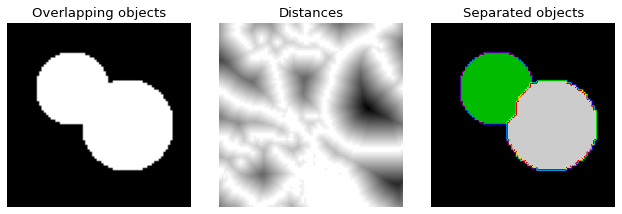

In [37]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [35]:
np.unique(distance, return_counts = True)

(array([-1.7977e+308,           0,           1,      1.4142,           2,      2.2361,      2.8284,           3,      3.1623,      3.6056,           4,      4.1231,      4.2426,      4.4721,           5,       5.099,      5.3852,      5.6569,       5.831,           6,      6.0828,      6.3246,      6.4031,      6.7082,
                  7,      7.0711,      7.2111,      7.2801,      7.6158,      7.8102,           8,      8.0623,      8.2462,      8.4853,       8.544,      8.6023,      8.9443,           9,      9.0554,      9.2195,       9.434,      9.4868,      9.8489,      9.8995,          10,       10.05,      10.198,      10.296,
              10.44,       10.63,       10.77,      10.817,          11,      11.045,       11.18,      11.314,      11.402,      11.662,      11.705,          12,      12.042,      12.083,      12.166,      12.207,      12.369,       12.53,      12.649,      12.806,          13,      13.038,      13.153,      13.342,
             13.416,      13.601,      

array([[          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0]])